In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

In [20]:
from google.colab import files
uploaded = files.upload()

Saving penguins.csv to penguins (3).csv
Saving quake.csv to quake (3).csv


In [3]:
quake = pd.read_csv('/content/quake.csv', header=None)

In [4]:
penguins = pd.read_csv('/content/penguins.csv', header=None)
dados_penguins = penguins.iloc[:, :-1]

In [5]:
scaler = StandardScaler()
dados_penguins = scaler.fit_transform(dados_penguins)
dados_quake = scaler.fit_transform(quake)

In [6]:
dados_penguins

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.02687621,  0.52644436, -0.56928439, -0.53738048],
       [ 1.24663828,  0.93330475,  0.64546078, -0.13315457],
       [ 1.13675725,  0.7807321 , -0.2120064 , -0.53738048]])

In [7]:
dados_quake

array([[-1.97199797, -0.22393957],
       [ 1.23018213,  0.80788009],
       [ 1.10967878,  0.73930527],
       ...,
       [ 0.65189703,  0.7117912 ],
       [ 0.9321983 ,  0.72415991],
       [ 0.52582694,  0.56639575]])

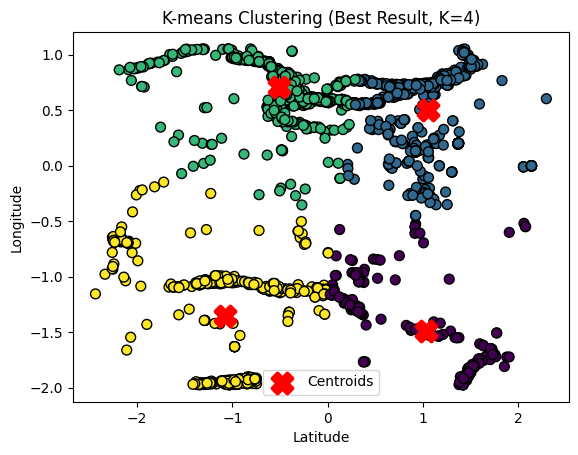

In [9]:
def kmeans(X, k, num_iterations=20):

    centroids = X[np.random.choice(X.shape[0], k, replace=False), :]

    for _ in range(num_iterations):
        distances = euclidean_distances(X, centroids)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.linalg.norm(new_centroids - centroids) < 1e-4:
            break

        centroids = new_centroids

    return centroids, labels

cluster_range = range(4, 21)

best_db_index = float('inf')
best_centroids = None
best_labels = None

for num_clusters in cluster_range:
    centroids, labels = kmeans(dados_quake, num_clusters)
    db_index = davies_bouldin_score(dados_quake, labels)

    if db_index < best_db_index:
        best_db_index = db_index
        best_centroids = centroids
        best_labels = labels

plt.scatter(dados_quake[:, 0], dados_quake[:, 1], c=best_labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(best_centroids[:, 0], best_centroids[:, 1],
            marker='X', s=200, linewidths=3, color='red', label='Centroids')
plt.title(f'K-means Clustering (Best Result, K={best_centroids.shape[0]})')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()


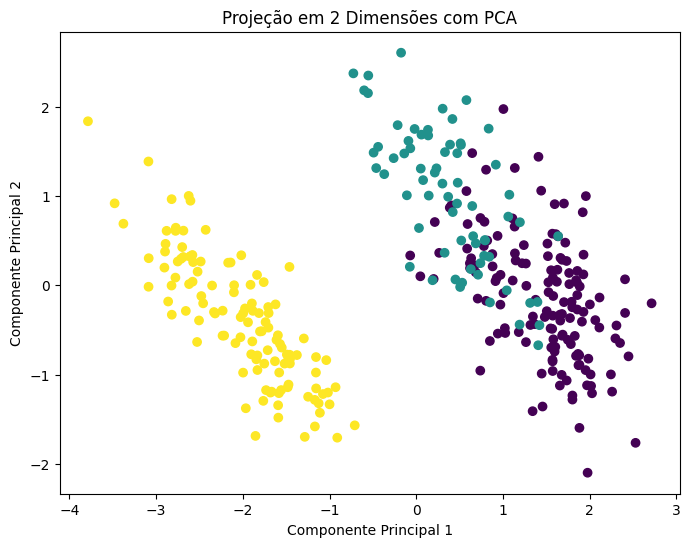

Explained Variance for 2 dimensions: 3.5341


In [10]:
def pca(X, num_components):

    mean = np.mean(X, axis=0)
    centered_data = X - mean

    covariance_matrix = np.cov(centered_data, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, indices]
    eigenvalues = eigenvalues[indices]

    selected_eigenvectors = eigenvectors[:, :num_components]
    projected_data = np.dot(centered_data, selected_eigenvectors)
    explained_variance = np.sum(eigenvalues[:num_components])

    return projected_data, selected_eigenvectors, explained_variance


num_components = 2
projected_data, eigenvectors,  explained_variance = pca(dados_penguins, num_components)

plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=penguins[4].astype('category').cat.codes, cmap='viridis')
plt.title('Projeção em 2 Dimensões com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()



print(f"Explained Variance for 2 dimensions: {explained_variance:.4f}")


In [13]:
explained_variance_list = []

for num_components in range(1, 5):

    _, _, explained_variance = pca(dados_penguins, num_components)
    explained_variance_list.append(explained_variance)

In [17]:
df_explained_variance = pd.DataFrame({'Number of Components': range(1, 5),
                                      'Explained Variance': explained_variance_list})

df_explained_variance

,Number of Components,Explained Variance
0,1,2.753625
1,2,3.534086
2,3,3.903839
3,4,4.012048
